<a href="https://colab.research.google.com/github/Srirama-Gollanavar/AI_ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (3).zip to archive (3) (1).zip
First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Checking for missing va

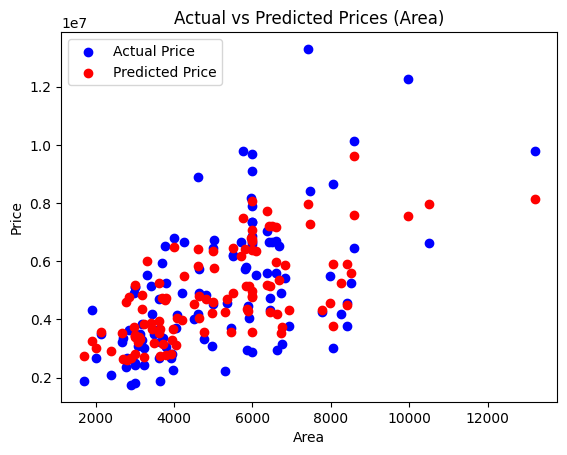

In [3]:
from google.colab import files
uploaded = files.upload()

import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

zip_file_name = list(uploaded.keys())[0]

with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('Housing.csv')
print("First 5 rows of the dataset:")
print(df.head())

#Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

#Feature Selection
X = df.drop(['price'], axis=1)
y = df['price']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training
model = LinearRegression()
model.fit(X_train, y_train)

#Model Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

#Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

#Visualization
if 'area' in X.columns:
    plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices (Area)')
    plt.legend()
    plt.show()
else:
    print("\nNo 'area' column found for plotting Area vs Price.")
